In [19]:
#import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [21]:
#upload the dataset
df = pd.read_csv('/content/Advertising.csv')

In [22]:
#print the head value
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [23]:
#check the total no of rows and columns
df.shape

(200, 5)

In [24]:
#list the columns
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [25]:
#general information of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [26]:
#perform a statical analysis
df.describe()


Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [27]:
#check for null values
df.isnull().sum()


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [28]:
#using 2 lib for expolaratory analysis
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

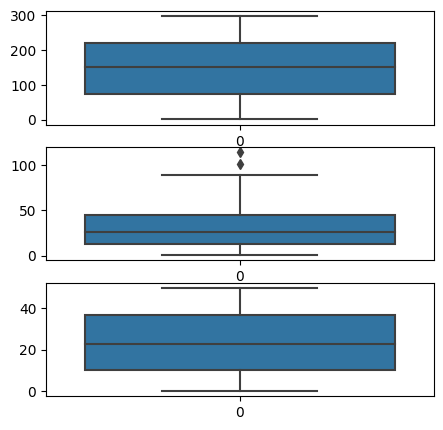

In [29]:
#check in for outlayers
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout

<Axes: xlabel='Newspaper', ylabel='Density'>

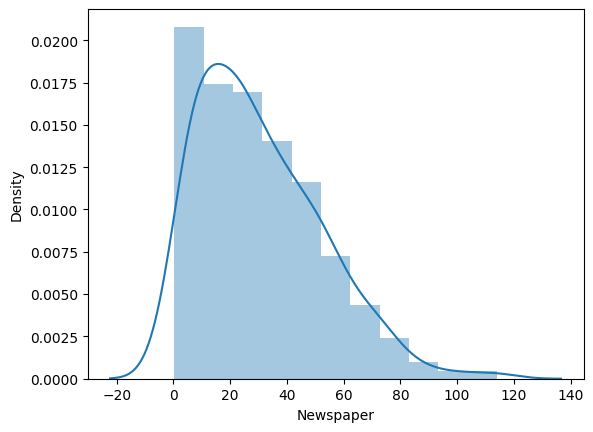

In [30]:
sns.distplot(df['Newspaper'])

In [31]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [32]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) - (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
-3.4250000000000043


In [33]:
data = df.copy()

In [34]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: >

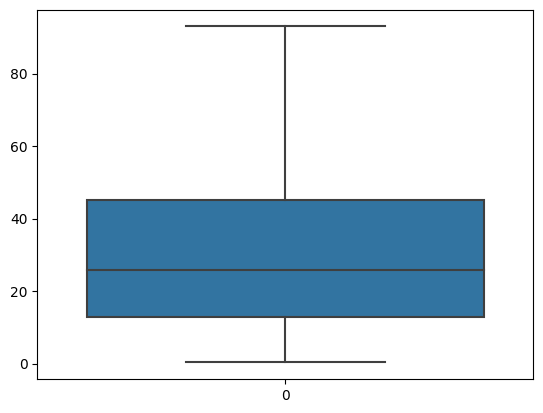

In [35]:
sns.boxplot(data['Newspaper'])

<Axes: >

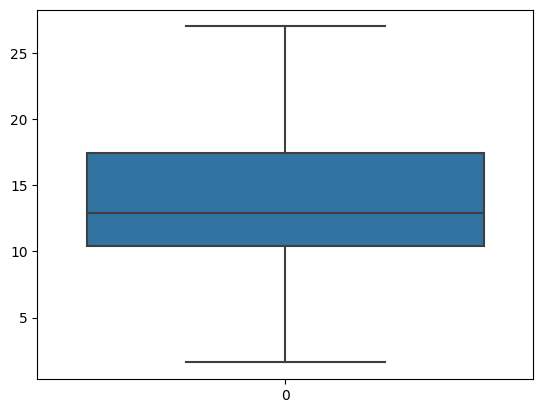

In [36]:
sns.boxplot(data['Sales'])

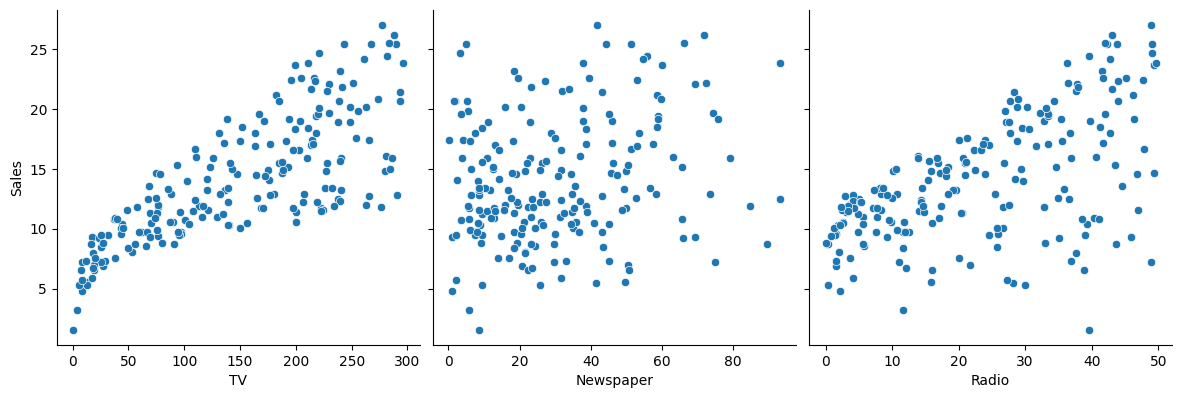

In [37]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

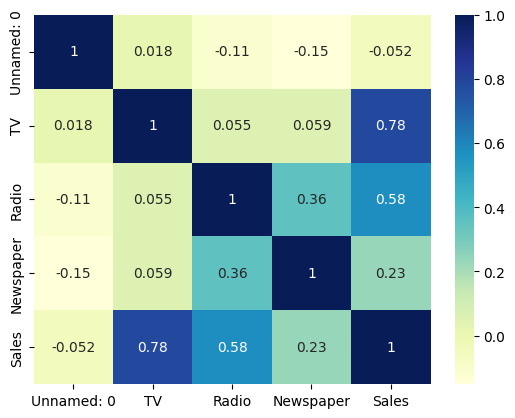

In [38]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [39]:
#important features
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [40]:
print(important_features)

['TV', 'Radio', 'Sales']


In [41]:
x = data['TV']
y = data['Sales']

In [42]:
x = x.values.reshape(-1,1)

In [43]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [44]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [46]:
#split the data
print(x.shape,y.shape)

(200, 1) (200,)


In [47]:
#split the data using train and test method
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [49]:
#importing the model algorithms
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [50]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn


KNeighborsRegressor()

In [51]:
knn_train_pred = knn.predict(x_train)


In [52]:
knn_test_pred = knn.predict(x_test)


In [53]:
print(knn_train_pred, knn_test_pred)

[10.5  16.56 12.44 15.9   4.34 21.52 15.9  16.7  15.36 17.32 10.5   6.32
  9.78 18.14 10.96 19.66 19.42  9.98 15.78 10.96 17.32 16.7  13.74  9.76
  9.78  6.32  7.64 12.94 10.04  9.44 22.48  4.34 17.3  18.7  13.1  10.52
  9.84 12.38 17.3  14.82 15.28 15.36 16.18 13.56 12.44 16.56 10.18  8.78
 17.32 22.5  18.08  9.84 17.54 15.06 15.56 12.9  21.52 15.56 13.74 20.14
 19.66  9.78 20.96 19.88 19.88 17.18 17.18 15.78 15.36 15.28  9.78 13.1
 15.06 18.14 15.9  15.36 17.3  15.28 13.56  8.2  16.56 10.52  9.12  9.84
 10.5  18.08 21.36  9.7  12.9  14.06 15.7  15.7   6.92 17.76 14.06 19.42
 10.96 17.32 10.52  5.88 10.96 11.74  8.78 10.5   8.78 14.08 20.22 17.2
  7.64  7.64  5.46 15.46 15.78 14.82 17.54 17.62  5.46 14.06 17.54 19.66
 15.06 12.6  16.26 11.3  20.14 12.   13.74 16.88  5.88 14.68 10.52 19.88
 15.06 13.1 ] [ 7.64 17.74 18.08 19.88 11.52 17.32 16.56 15.48 21.52  8.2  10.52 11.3
 12.38 17.76 12.38 16.7   5.46 10.12 14.26 15.46 13.74  9.76 14.6  10.26
 16.52  9.78 10.04 15.42  5.9   9.78 10.

In [54]:
Results = pd.DataFrame(columns=["Model","Train R2","Test RMSE","Variance"])


In [56]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.38957800009594934
RMSE: 4.112489476821757


In [57]:
Results.head()

Model  Train R2  Test RMSE  Variance   Test R2
0  K-Nearest Neighbors  0.704829   4.112489  0.315251  0.389578

In [58]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [60]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [61]:
print(svr_train_pred,svr_test_pred)

[10.85871451 15.96445236 12.16271673 17.4371506   7.40955186 17.62746753
 15.37675116 17.49150671 17.27884028 15.70458015 10.70029459  7.54906064
 11.1475082  16.1678653  10.16303668 16.39507378 16.34465195  8.80597141
 17.56279636 10.35502298 17.0517331  17.50562115 13.48553707  8.63215924
 11.1975824   7.55100454  7.67625076 11.99993836  9.17999375  9.24268351
 17.69633755  7.42699621 17.73566031 16.93988174 12.5413752   9.81391705
  8.34865203 11.83870795 17.73391608 15.15811652 14.00684548 17.24506588
 17.08825093 17.15858606 12.22614816 15.94264578  8.88521169  7.91998302
 17.02881616 17.66673308 16.90299136  8.41225138 17.73505499 14.74434948
 17.52439787 13.54107248 17.61098554 17.53268956 13.44112311 17.69988331
 17.65503605 11.04763133 17.53695159 17.37754537 17.44372947 16.77794737
 16.81401043 17.53759118 17.29765399 14.01236676 11.12250616 12.40178537
 14.92771626 16.18842647 15.34735364 17.30461753 17.7357881  14.10608007
 17.15858606  7.82219489 16.6868005   9.74517702  8

In [63]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5617214418663614
RMSE: 3.484695408098728


In [64]:
Results.head()

Model  Train R2  Test RMSE  Variance   Test R2
0     K-Nearest Neighbors  0.704829   4.112489  0.315251  0.389578
1  Support Vector Machine  0.590786   3.484695  0.029064  0.561721

In [65]:
import statsmodels.api as sm

In [66]:
x_train_constant = sm.add_constant(x_train)


In [67]:
model = sm.OLS(y_train, x_train_constant).fit()


In [70]:
model.params


const    6.836506
x1       0.047915
dtype: float64

In [69]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     219.0
Date:                Fri, 05 May 2023   Prob (F-statistic):           8.05e-30
Time:                        07:57:46   Log-Likelihood:                -344.83
No. Observations:                 134   AIC:                             693.7
Df Residuals:                     132   BIC:                             699.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8365      0.563     12.137      0.0

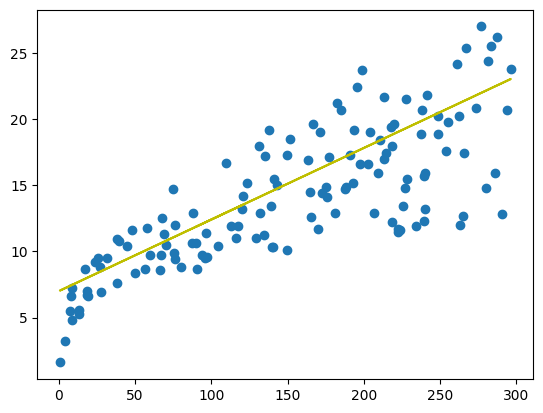

In [71]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')
plt.show()


In [72]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

107   -2.467995
162   -0.963636
79    -1.394611
165   -6.172504
130   -5.270046
         ...   
41     1.782592
49    -0.341999
101    2.761576
171   -0.218474
7      0.604147
Name: Sales, Length: 134, dtype: float64

In [73]:
y_train_pred


array([11.16799494, 15.86363588, 12.39461135, 18.07250371,  6.87004604,
       20.26220566, 15.25511915, 18.21145635, 17.72272638, 15.5857306 ,
       11.01466789,  7.46418837, 11.44590022, 16.09362646, 10.49239763,
       16.36674027, 16.30445116,  9.15078593, 18.41748958, 10.67926497,
       17.30586846, 18.24978812, 13.55893865,  8.96871005, 11.49381493,
        7.46897984,  7.73251071, 12.24607577,  9.52931209,  9.5916012 ,
       19.95076009,  7.03295603, 19.42369835, 17.12379258, 12.73480575,
       10.15220323,  8.65726448, 12.09754019, 19.35661777, 15.04429445,
       14.00933686, 17.65564579, 17.36815757, 17.4927358 , 12.452109  ,
       15.83967853,  9.23224092,  8.1206198 , 17.2675367 , 20.10408714,
       17.06629494,  8.72913654, 19.54348511, 14.66097683, 18.30249429,
       13.60685335, 20.31970331, 18.32645164, 13.52060688, 18.99725749,
       18.75768397, 11.35007082, 20.54011094, 20.90426269, 20.76531005,
       16.8794276 , 16.93213377, 18.34082605, 17.76105814, 14.01

<Figure size 640x480 with 0 Axes>

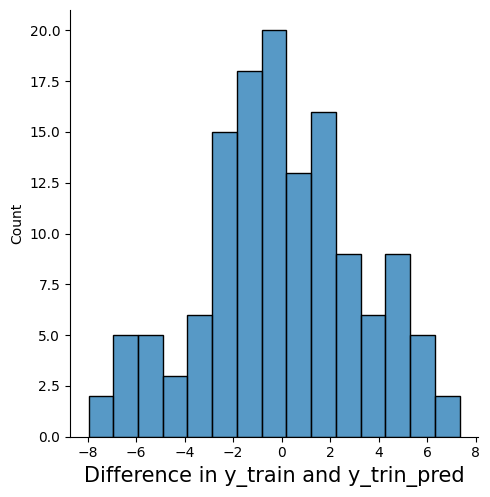

In [74]:
fig = plt.figure()
sns.displot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_trin_pred', fontsize = 15)
plt.show()

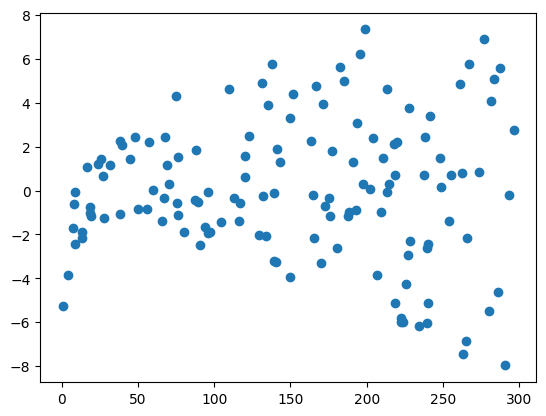

In [75]:
plt.scatter(x_train, res)
plt.show()

In [76]:
x_test_constant = sm.add_constant(x_test)
y_pred= model.predict(x_test_constant)


In [77]:
y_pred


array([ 7.77563394, 17.20524758, 16.93692524, 20.8707224 , 11.7573458 ,
       17.22441346, 16.74526643, 14.90534181, 20.28616301,  8.03916481,
       10.11387147, 10.44448292, 12.14066342, 15.83488706, 12.09754019,
       18.21145635,  7.23898926, 11.64714198, 13.36248836, 14.33994831,
       13.50623247,  8.978293  , 17.40169786,  8.90162947, 17.95750842,
       11.50818934,  9.39994239, 17.8329302 ,  7.39710778, 11.33569641,
        9.82159178, 20.45865595, 12.85938398, 16.65901996, 16.4098635 ,
       18.85830485, 18.48936163, 11.9825449 , 15.69593442,  7.69417894,
       14.67055977,  8.60455831, 12.63418487, 17.15733288, 13.89434157,
       15.31740826, 10.35344499, 10.43489998, 10.58343556, 10.94279584,
        7.66063865, 20.71739534,  8.20686627, 18.33124311, 16.37632321,
       16.30445116, 17.86167902, 17.39211492,  8.03437334, 20.0945042 ,
       10.4971891 ,  7.66063865, 10.14262029,  7.09524515, 16.4098635 ,
        8.896838  ])

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [79]:
np.sqrt(mean_squared_error(y_test, y_pred))


3.3895964748093315

In [80]:
r2 = r2_score(y_test, y_pred)
r2

0.5853166706111427

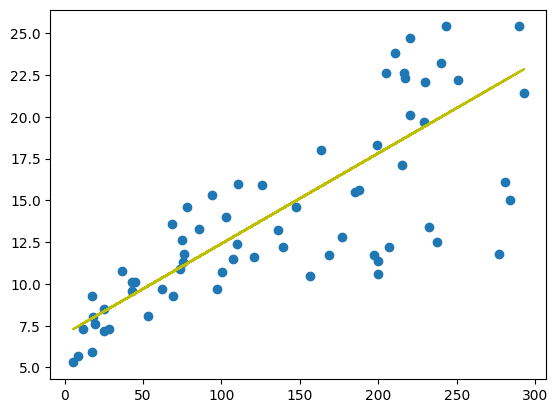

In [81]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.9955 + 0.0541 * x_test, 'y')